In [1]:
from scipy.io import loadmat
from scipy.interpolate import griddata
import numpy as np
from numpy import matlib
from model import *
import matplotlib.pyplot as plt

In [2]:
earth_model=loadmat('data/MMC10.MAT')

In [3]:
ep = earth_model['ep']
mu = earth_model['mu']
sig = earth_model['sig']
x = earth_model['x'].flatten()
z = earth_model['z'].flatten()

In [4]:
#z=np.linspace(0,10,ep.shape[1])
#x=np.linspace(0,20,ep.shape[0])

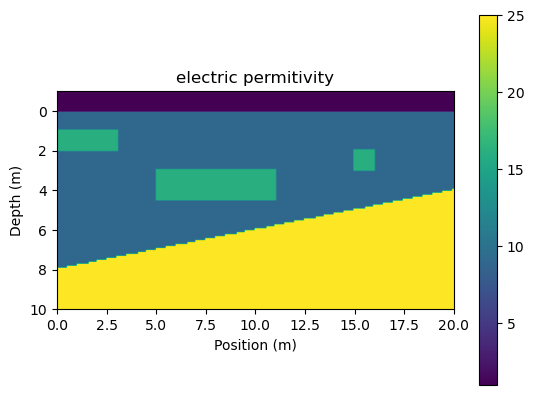

In [5]:
plt.figure(1)
plt.imshow(ep.transpose(), extent=(x[0], x[-1],z[-1], z[0]))
plt.gca().set_aspect('equal', adjustable='box')
plt.title("electric permitivity")
plt.xlabel('Position (m)')
plt.ylabel('Depth (m)')
plt.colorbar()

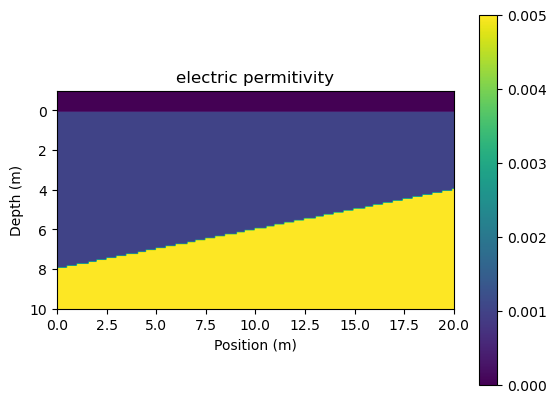

In [6]:
plt.figure(1)
plt.imshow(sig.transpose(),  extent=(x[0], x[-1],z[-1], z[0]))
plt.gca().set_aspect('equal', adjustable='box')
plt.title("electric permitivity")
plt.xlabel('Position (m)')
plt.ylabel('Depth (m)')
plt.colorbar()

In [7]:
epmin = np.min(ep)
epmax = np.max(ep)
mumin = np.min(mu)
mumax = np.max(mu)

In [8]:
t = np.arange(0, 100e-9, 1e-10)
srcpulse = blackharrispulse(100e6, t)

# Use finddx.m to determine maximum possible spatial field discretization
dx, wlmin, fmax = finddx(epmax, mumax, srcpulse, t, 0.02)
print(f"Maximum frequency contained in source pulse = {fmax / 1e6} MHz")
print(f"Minimum wavelength in simulation grid = {wlmin} m")
print(f"Maximum possible electric/magnetic field discretization (dx,dz) = {dx} m")
print(f"Maximum possible electrical property discretization (dx/2,dz/2) = {dx / 2} m")

Maximum frequency contained in source pulse = 283.203125 MHz
Minimum wavelength in simulation grid = 0.21171550137706255 m
Maximum possible electric/magnetic field discretization (dx,dz) = 0.04234310027541251 m
Maximum possible electrical property discretization (dx/2,dz/2) = 0.021171550137706253 m


In [9]:
# Set dx and dz here (m) using the above results as a guide
dx = 0.04
dz = 0.04
print(f"Using dx = {dx} m, dz = {dz} m")

Using dx = 0.04 m, dz = 0.04 m


In [10]:
# Find the maximum possible time step using this dx and dz
dtmax = finddt(epmin, mumin, dx, dz)
print(f"Maximum possible time step with this discretization = {dtmax / 1e-9} ns")

Maximum possible time step with this discretization = 0.08086814868731179 ns


In [11]:

# Set proper dt here (s) using the above results as a guide
dt = 8e-11
print(f"Using dt = {dt / 1e-9} ns")

Using dt = 0.07999999999999999 ns


In [12]:
# Create time vector (s) and corresponding source pulse
t = np.arange(0,40*dt, dt)
srcpulse = blackharrispulse(100e6, t)

Text(0.5, 0, 'time.(s)')

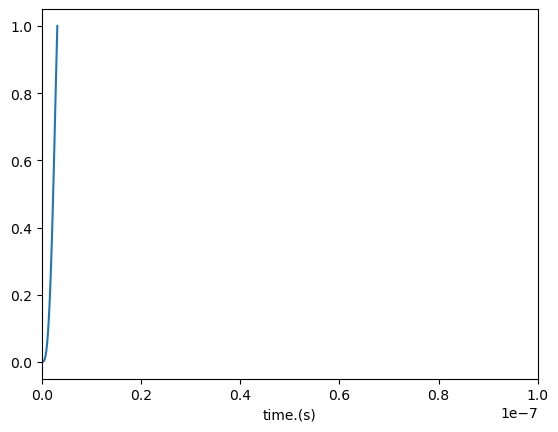

In [13]:
plt.subplots()
plt.plot(t,srcpulse)
plt.xlim(0,.01e-5)
plt.xlabel('time.(s)')

In [14]:
# Interpolate electrical property grids to proper spatial discretization
x2 = np.arange(min(x), max(x)+1e-10, dx / 2)
z2 = np.arange(min(z), max(z)+1e-10, dz / 2)
ep2 = gridinterp(ep, x, z, x2, z2, 'linear')
mu2 = gridinterp(mu, x, z, x2, z2, 'linear')
sig2 = gridinterp(sig, x, z, x2, z2, 'linear')

In [15]:
# Pad electrical property matrices for PML absorbing boundaries
npml = 10
ep3, x3, z3 = padgrid(ep2, x2, z2, 2*npml+1)
mu3, _, _ = padgrid(mu2, x2, z2, 2*npml+1)
sig3, _, _ = padgrid(sig2, x2, z2, 2*npml+1)


In [16]:
# Create source and receiver location matrices
srcx = np.arange(1,19,1)
srcz = 0*np.ones(srcx.shape)
recx = srcx + 1
recz = srcz
srcloc = np.column_stack((srcx, srcz))
recloc = np.column_stack((recx, recz))

In [17]:
srcloc[:,0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])

In [18]:
srcz

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [19]:
# Set some output and plotting parameters
outstep = 4
plotopt = [1, 50, 0.002]

0
1.0
xEy - srcloc[s, 0]
1.3322676295501878e-15
1
2.0
xEy - srcloc[s, 0]
2.220446049250313e-15
2
3.0
xEy - srcloc[s, 0]
3.1086244689504383e-15
3
4.0
xEy - srcloc[s, 0]
3.552713678800501e-15
4
5.0
xEy - srcloc[s, 0]
4.440892098500626e-15
5
6.0
xEy - srcloc[s, 0]
5.329070518200751e-15
6
7.0
xEy - srcloc[s, 0]
6.217248937900877e-15
7
8.0
xEy - srcloc[s, 0]
7.105427357601002e-15
8
9.0
xEy - srcloc[s, 0]
8.881784197001252e-15
9
10.0
xEy - srcloc[s, 0]
8.881784197001252e-15
10
11.0
xEy - srcloc[s, 0]
8.881784197001252e-15
11
12.0
xEy - srcloc[s, 0]
1.0658141036401503e-14
12
13.0
xEy - srcloc[s, 0]
1.2434497875801753e-14
13
14.0
xEy - srcloc[s, 0]
1.2434497875801753e-14
14
15.0
xEy - srcloc[s, 0]
1.2434497875801753e-14
15
16.0
xEy - srcloc[s, 0]
1.4210854715202004e-14
16
17.0
xEy - srcloc[s, 0]
1.7763568394002505e-14
17
18.0
xEy - srcloc[s, 0]
1.7763568394002505e-14
print srci
[ 35  60  85 110 135 160 185 210 235 260 285 310 335 360 385 410 435 460]
index:
35
35
source position:
1.00000000000

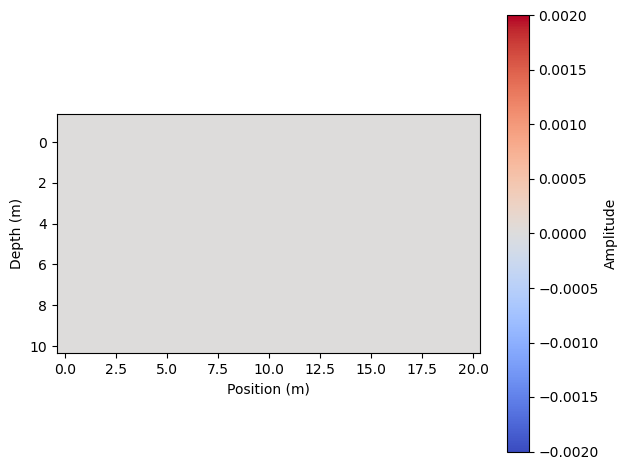

index:
60
35
source position:
2.000000000000002
8.881784197001252e-16
Source 1/18, Iteration 1/40, t = 0.0 ns


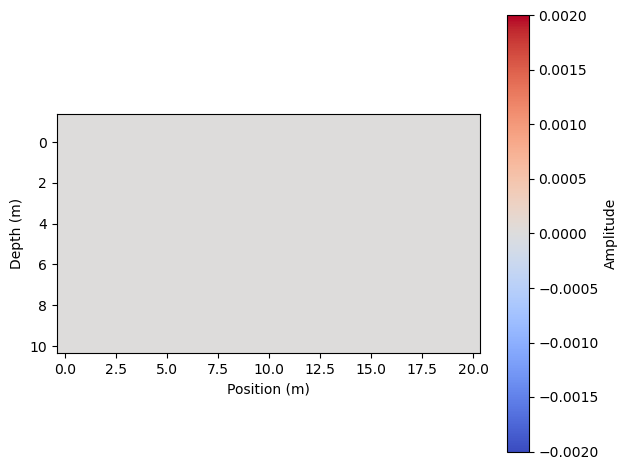

index:
85
35
source position:
3.000000000000003
8.881784197001252e-16
Source 2/18, Iteration 1/40, t = 0.0 ns


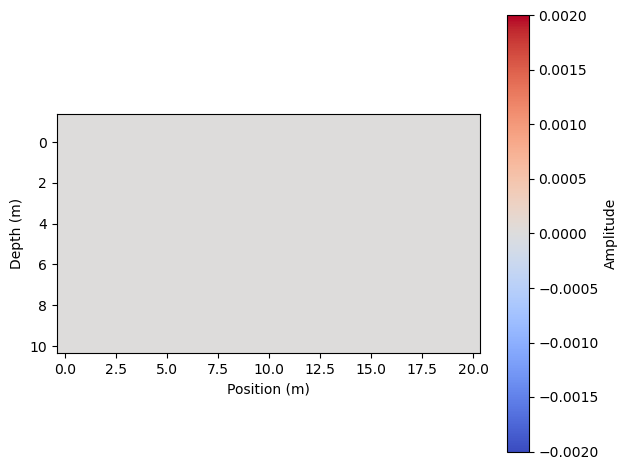

index:
110
35
source position:
4.0000000000000036
8.881784197001252e-16
Source 3/18, Iteration 1/40, t = 0.0 ns


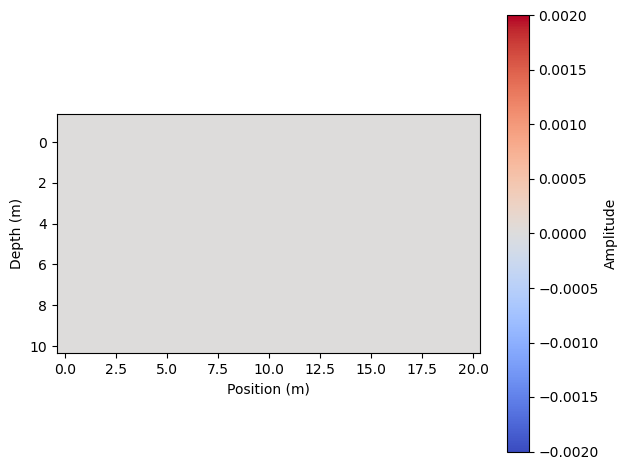

index:
135
35
source position:
5.000000000000004
8.881784197001252e-16
Source 4/18, Iteration 1/40, t = 0.0 ns


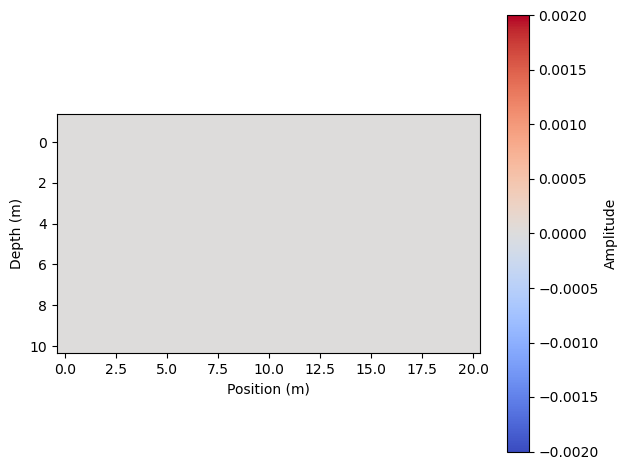

index:
160
35
source position:
6.000000000000005
8.881784197001252e-16
Source 5/18, Iteration 1/40, t = 0.0 ns


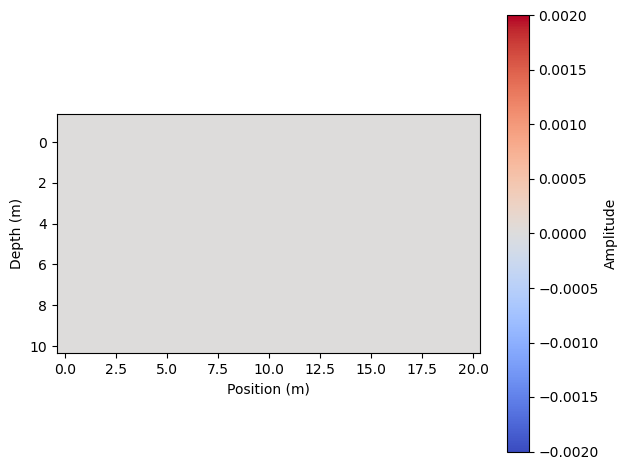

index:
185
35
source position:
7.000000000000006
8.881784197001252e-16
Source 6/18, Iteration 1/40, t = 0.0 ns


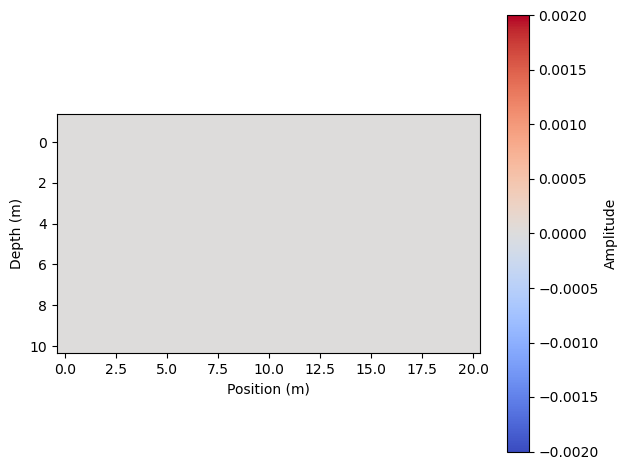

index:
210
35
source position:
8.000000000000007
8.881784197001252e-16
Source 7/18, Iteration 1/40, t = 0.0 ns


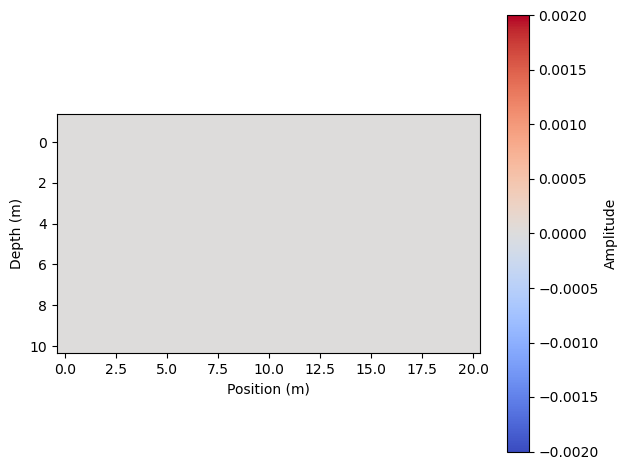

index:
235
35
source position:
9.000000000000009
8.881784197001252e-16
Source 8/18, Iteration 1/40, t = 0.0 ns


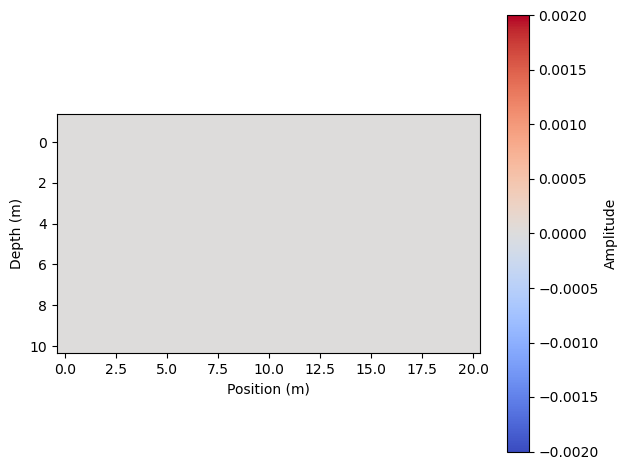

index:
260
35
source position:
10.000000000000009
8.881784197001252e-16
Source 9/18, Iteration 1/40, t = 0.0 ns


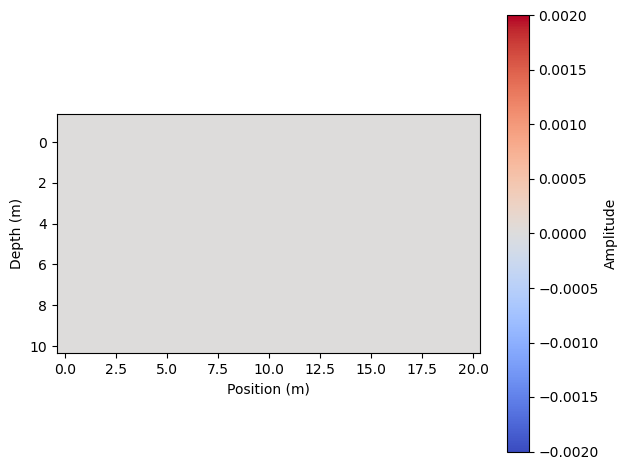

index:
285
35
source position:
11.000000000000009
8.881784197001252e-16
Source 10/18, Iteration 1/40, t = 0.0 ns


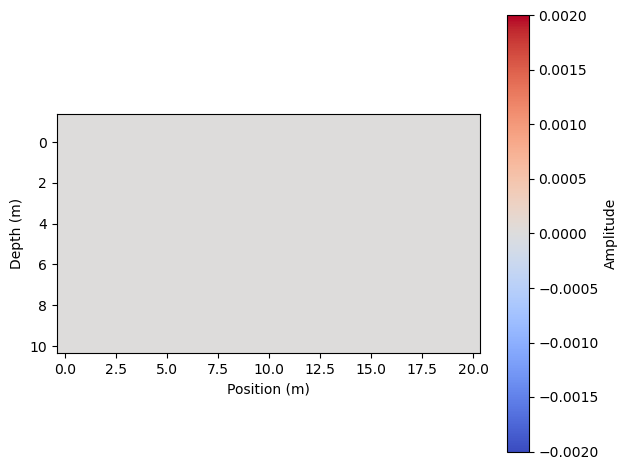

index:
310
35
source position:
12.00000000000001
8.881784197001252e-16
Source 11/18, Iteration 1/40, t = 0.0 ns


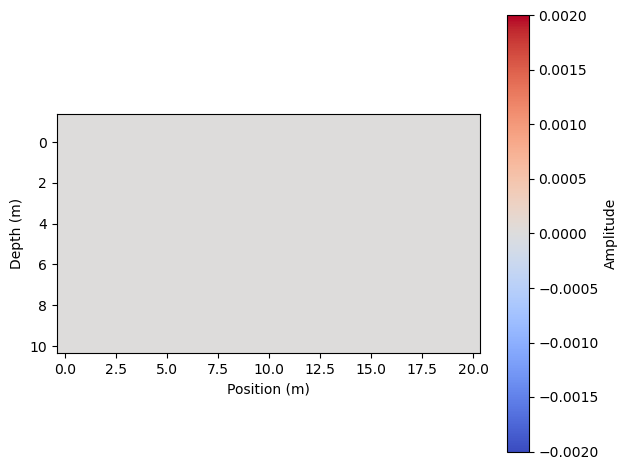

index:
335
35
source position:
13.000000000000012
8.881784197001252e-16
Source 12/18, Iteration 1/40, t = 0.0 ns


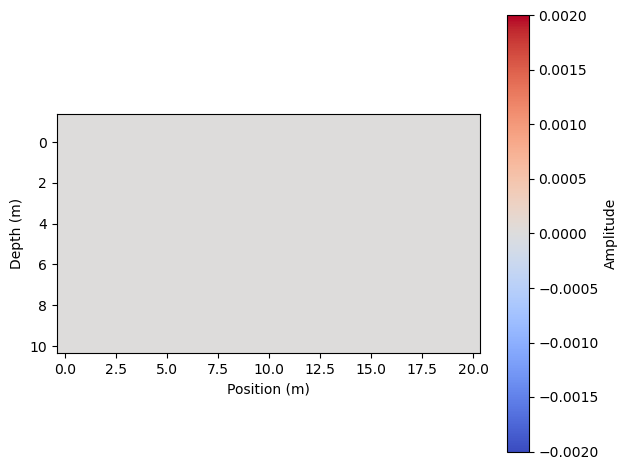

index:
360
35
source position:
14.000000000000012
8.881784197001252e-16
Source 13/18, Iteration 1/40, t = 0.0 ns


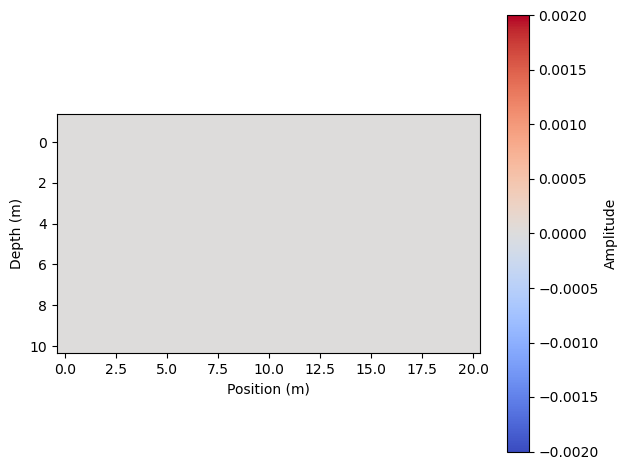

index:
385
35
source position:
15.000000000000012
8.881784197001252e-16
Source 14/18, Iteration 1/40, t = 0.0 ns


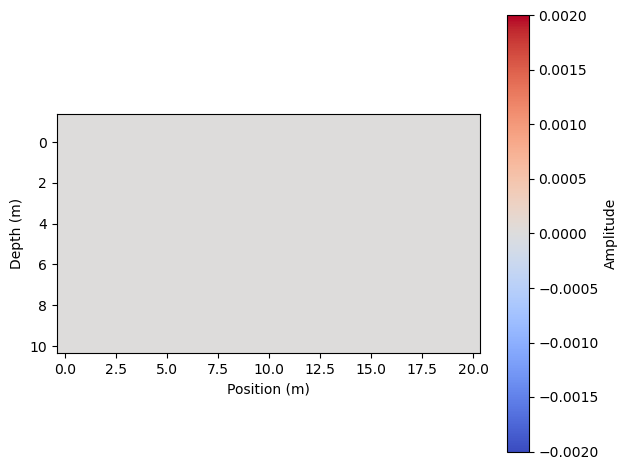

index:
410
35
source position:
16.000000000000014
8.881784197001252e-16
Source 15/18, Iteration 1/40, t = 0.0 ns


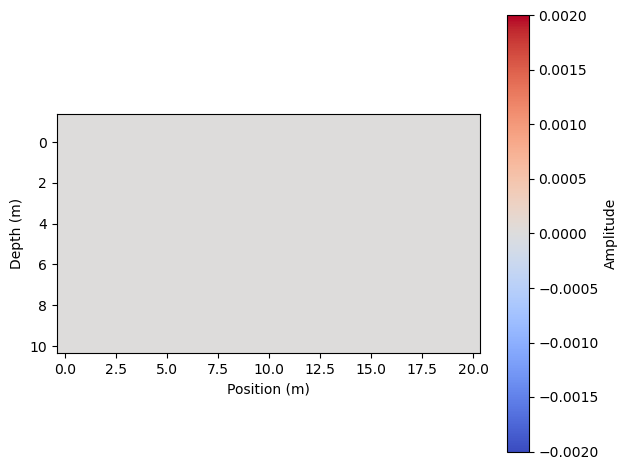

index:
435
35
source position:
17.000000000000018
8.881784197001252e-16
Source 16/18, Iteration 1/40, t = 0.0 ns


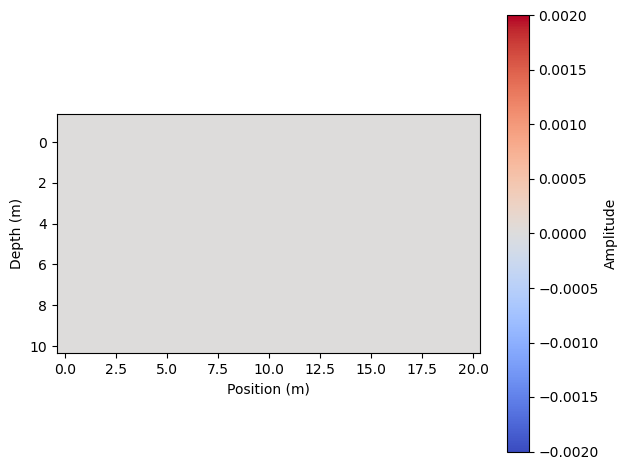

index:
460
35
source position:
18.000000000000018
8.881784197001252e-16
Source 17/18, Iteration 1/40, t = 0.0 ns


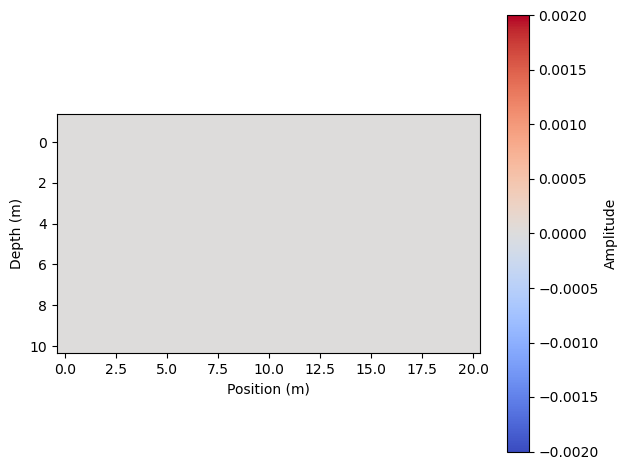

In [20]:
# Run the simulation
gather, tout, srcx, srcz, recx, recz = TM_model2d(ep3, mu3, sig3, x3, z3, srcloc, recloc, srcpulse, t, npml, outstep, plotopt)

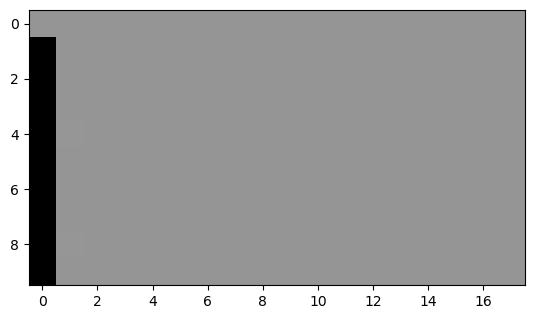

In [21]:
plt.subplots()
plt.imshow(gather[:,:,0],vmin=-.001,vmax=.001,cmap='Grays')

In [ ]:
# Extract common offset reflection GPR data from multi-offset data cube and plot the results
co_data = np.zeros((len(tout), len(srcx)))
for i in range(len(srcx)):
    co_data[:, i] = gather[:, i, i]
pos = (srcx + recx) / 2
plt.figure()
plt.imshow(co_data, extent=(x[0], x[-1],z[-1], z[0]), aspect='auto', cmap='gray', vmin=-5e-4, vmax=5e-4)
plt.colorbar(label='Amplitude')
plt.xlabel('Position (m)')
plt.ylabel('Time (ns)')
plt.title('Common Offset Reflection GPR Data')
plt.show()